# 3D Map
While representing the configuration space in 3 dimensions isn't entirely practical it's fun (and useful) to visualize things in 3D.

In this exercise we'll finish the implementation of create_grid such that a 3D grid is returned where cells containing a voxel are set to True. We'll then plot the results


In [15]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 16

In [2]:
filename = 'colliders.csv'
data = np.loadtxt(filename,delimiter=',',dtype='Float64',skiprows=2)

In [11]:
def create_voxmap(data,voxel_size):
  """
  Returns a grid representation of a 3D configuration space
  based on given obstacle data.
  The voxel_size argument sets the resolution of the voxel map
  """
  # minimum and maximum north coordinates 
  north_min = np.floor(np.amin(data[:,0] - data[:,3]))
  north_max = np.ceil(np.amax(data[:,1] - data[:,4]))
  # minimum and maximum east coordinates
  east_min = np.floor(np.amin(data[:,1] - data[:,4]))
  east_max = np.ceil(np.amax(data[:,1] + data[:,4]))
  # maximum altitude 
  alt_max = np.ceil(np.amax(data[:,2] + data[:,5]))
  # Construct the voxmap 
  north_size = int(north_max - north_min) // voxel_size
  east_size = int(east_max - east_min) // voxel_size
  altitude_size = int(alt_max) // voxel_size
  voxmap = np.zeros((north_size,east_size,altitude_size))
  for i in range(data.shape[0]):
    north,east,alt,d_north,d_east,d_alt = data[i,:]
    voxmap[int(north-d_north-north_min) // voxel_size:int(north+d_north-north_min) // voxel_size,
           int(east-d_east-east_min) // voxel_size:int(east+d_east-east_min) // voxel_size,
           int(alt - d_alt ) // voxel_size:int(alt+d_alt)//voxel_size] = 1
  return voxmap 

In [12]:
voxmap = create_voxmap(data,10)

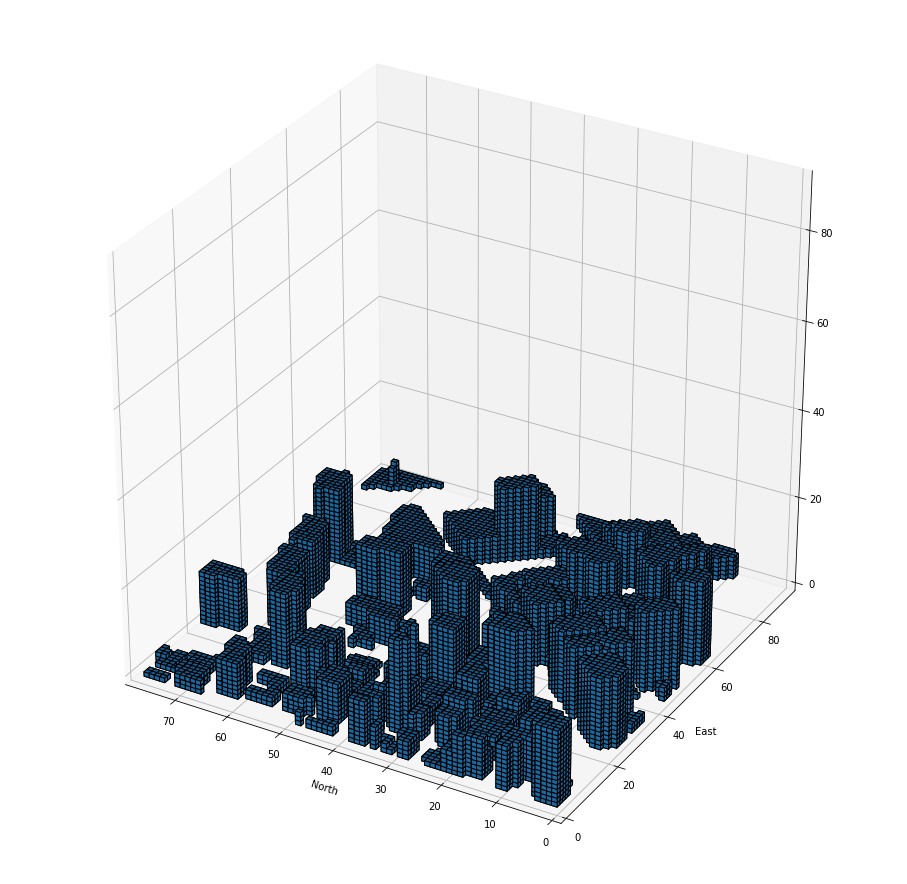

In [16]:
import time 
t1 = time.perf_counter()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxmap,edgecolors='k')
ax.set_xlim(voxmap.shape[0],0)
ax.set_ylim(0,voxmap.shape[1])
ax.set_zlim(0,voxmap.shape[2]+70)
plt.xlabel('North')
plt.ylabel('East')
plt.show()
final_t = time.perf_counter() - t1 

In [18]:
print('Time Duration: ',final_t)

Time Duration:  42.6614679490001
